Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
# from plotnine import *

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# import utils


Load Data from CSV files


In [2]:
global_df = pd.read_csv('LooksvsPersonality.csv')
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unweighted_Sample  1440 non-null   int64  
 1   Weighted_Sample    1440 non-null   int64  
 2   Q                  1440 non-null   object 
 3   Nationality        1440 non-null   object 
 4   Gender             1440 non-null   object 
 5   Rank (text)        1440 non-null   object 
 6   Rank (number)      1440 non-null   int64  
 7   Percentage         1440 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 90.1+ KB


In [3]:
egy_df = pd.read_csv('Egy_dataset.csv')
egy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   276 non-null    int64  
 1   Q            276 non-null    object 
 2   Nationality  276 non-null    object 
 3   Gender       276 non-null    object 
 4   Rank (text)  276 non-null    int64  
 5   Percentage   276 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 13.1+ KB


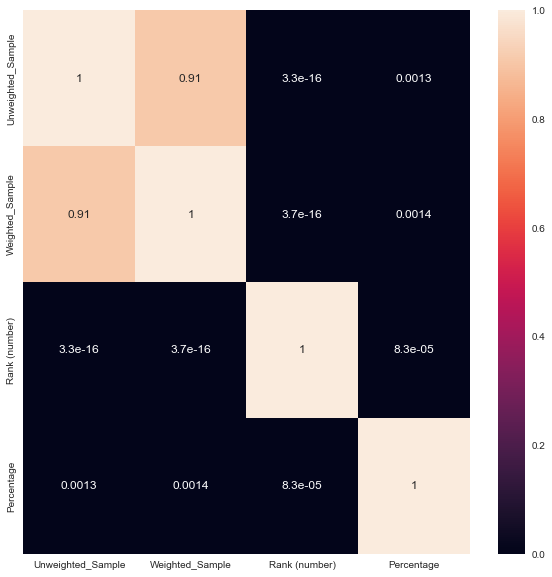

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(global_df.corr(), annot=True)
plt.show()

Encode Gender Column to 0,1 to both global_df  & egy_df and Nationality Column in global_df

In [5]:
label_encoder = preprocessing.LabelEncoder()
global_df['Gender'] = label_encoder.fit_transform(global_df['Gender'])
# global_df['Nationality'] = label_encoder.fit_transform(global_df['Nationality'])
egy_df['Gender'] = label_encoder.fit_transform(egy_df['Gender'])

Droping Nationality Column to enhance model

In [6]:
global_df = global_df.drop('Nationality',axis=1)
egy_df = egy_df.drop(['Nationality','Unnamed: 0'],axis=1)

Make one-hot encoding to Q column

In [7]:
global_df = pd.get_dummies(global_df ,'Q')
egy_df = pd.get_dummies(egy_df ,'Q')

In [8]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unweighted_Sample                          1440 non-null   int64  
 1   Weighted_Sample                            1440 non-null   int64  
 2   Gender                                     1440 non-null   int32  
 3   Rank (number)                              1440 non-null   int64  
 4   Percentage                                 1440 non-null   float64
 5   Q_They are good looking                    1440 non-null   uint8  
 6   Q_They are intelligent                     1440 non-null   uint8  
 7   Q_They have a personality I like           1440 non-null   uint8  
 8   Q_They have a sense of humour I like       1440 non-null   uint8  
 9   Q_They have similar interests to me        1440 non-null   uint8  
 10  Q_They have/make a decen

In [9]:
global_df.head()

,Unweighted_Sample,Weighted_Sample,Gender,Rank (number),Percentage,Q_They are good looking,Q_They are intelligent,Q_They have a personality I like,Q_They have a sense of humour I like,Q_They have similar interests to me,Q_They have/make a decent amount of money,Q_Ranked fifth,Q_Ranked first,Q_Ranked fourth,Q_Ranked second,Q_Ranked sixth,Q_Ranked third
0,454,530,0,1,0.18,1,0,0,0,0,0,0,1,0,0,0,0
1,454,530,0,2,0.13,1,0,0,0,0,0,0,0,0,1,0,0
2,454,530,0,3,0.16,1,0,0,0,0,0,0,0,0,0,0,1
3,454,530,0,4,0.19,1,0,0,0,0,0,0,0,1,0,0,0
4,454,530,0,5,0.25,1,0,0,0,0,0,1,0,0,0,0,0


In [10]:
global_df.iloc[2]

Unweighted_Sample                            454.00
Weighted_Sample                              530.00
Gender                                         0.00
Rank (number)                                  3.00
Percentage                                     0.16
Q_They are good looking                        1.00
Q_They are intelligent                         0.00
Q_They have a personality I like               0.00
Q_They have a sense of humour I like           0.00
Q_They have similar interests to me            0.00
Q_They have/make a decent amount of money      0.00
Q_Ranked fifth                                 0.00
Q_Ranked first                                 0.00
Q_Ranked fourth                                0.00
Q_Ranked second                                0.00
Q_Ranked sixth                                 0.00
Q_Ranked third                                 1.00
Name: 2, dtype: float64

In [11]:
test = [454,530,1,3,0.18,1,0,0,0,0,0,0,0,0,0,0,1]

In [12]:
scaler = MinMaxScaler()
scaler_global_df = scaler.fit_transform(global_df)
scaler_global_df = pd.DataFrame(global_df)

In [13]:
scaler = MinMaxScaler()
scaler_egy_df = scaler.fit_transform(egy_df)
scaler_egy_df = pd.DataFrame(egy_df)

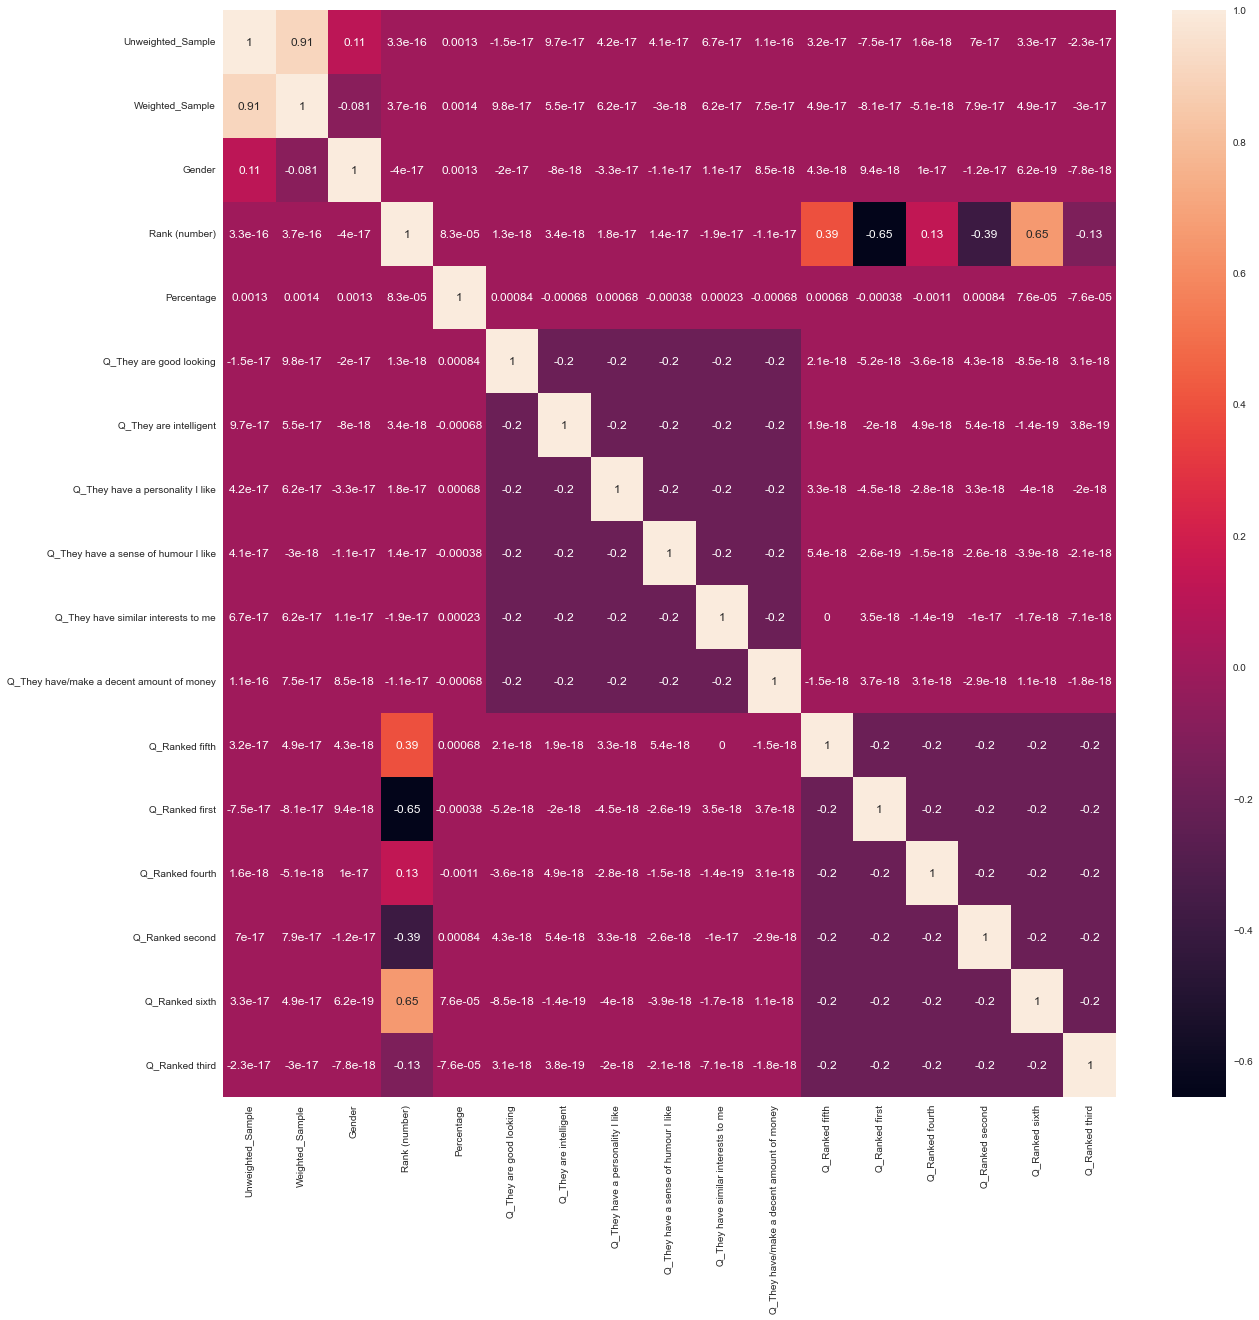

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(global_df.corr(), annot=True)
plt.show()

Visualize the best number of clusters for Kmean model on global_df

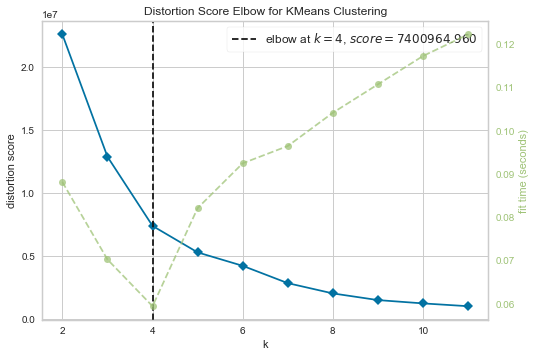

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
kmean_model = KMeans()
visualizer = KElbowVisualizer(kmean_model, k=(2,12)).fit(scaler_global_df)
visualizer.show()

Building Kmean model using k = 4

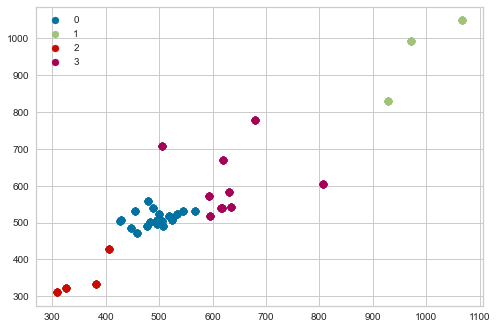

In [16]:
k_mean = KMeans(n_clusters=4).fit(scaler_global_df)
k_labels = k_mean.labels_
k_predict = k_mean.fit_predict(scaler_global_df)
unique_labels = np.unique(k_predict)
for i in unique_labels:
    plt.scatter(scaler_global_df.iloc[k_predict == i , 0] , scaler_global_df.iloc[k_predict == i , 1] , label = i)
plt.legend()
plt.show()

Silhouette Coefficient for Kmean model on global_df

In [17]:
print("Silhouette Coefficient For Kmeans : %0.3f" % silhouette_score(scaler_global_df,k_labels))

Silhouette Coefficient For Kmeans : 0.598


Enhancing Kmean model by applying PCA

In [18]:
pca = PCA()
df_pca =pca.fit(scaler_global_df) 
pca.explained_variance_ratio_

array([9.54356330e-01, 4.55369135e-02, 6.85984201e-05, 4.45201481e-06,
       3.70802421e-06, 3.70802271e-06, 3.70802271e-06, 3.70802271e-06,
       3.70802271e-06, 3.70802271e-06, 3.70802271e-06, 3.70802271e-06,
       3.70802271e-06, 3.34044977e-07, 4.08355597e-37, 2.79913861e-37,
       1.64772800e-37])

Visualize the Best number of components for PCA

Text(0, 0.5, 'cumulative explained variance')

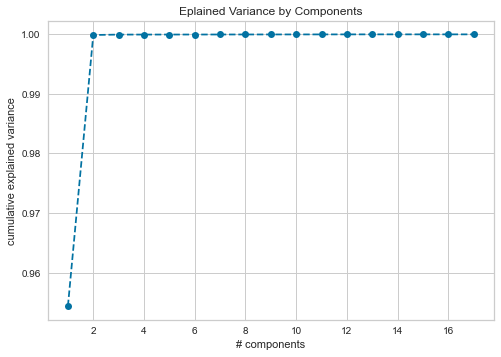

In [19]:
plt.plot(range(1,len(scaler_global_df.columns)+1),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Eplained Variance by Components')
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

Fit PCA with 2 components and create df from that transformed data

In [20]:
pca = PCA(2)
df_pc = pca.fit(scaler_global_df)
_trans = pca.transform(scaler_global_df)

df_trans = pd.DataFrame(data= _trans)
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1440 non-null   float64
 1   1       1440 non-null   float64
dtypes: float64(2)
memory usage: 22.6 KB


Visualize the new Transformed data

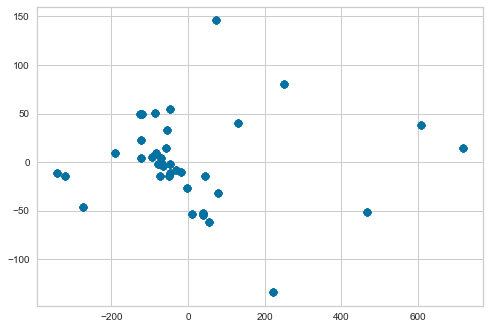

In [21]:
plt.scatter(df_trans[0],df_trans[1])

Appling Kmean Clustering on the Transformed data

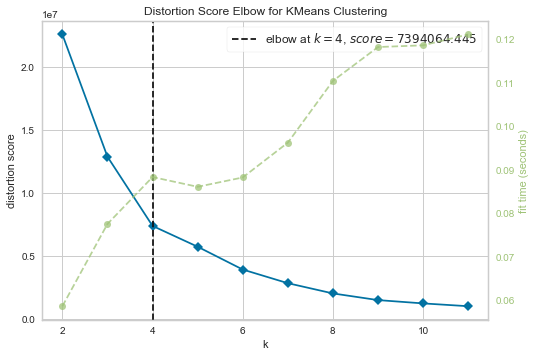

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
kmean_model = KMeans()
visualizer = KElbowVisualizer(kmean_model, k=(2,12)).fit(df_trans)
visualizer.show()

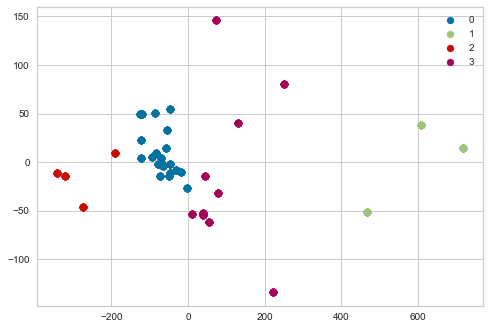

In [23]:
k_mean = KMeans(n_clusters=4).fit(df_trans)
k_labels = k_mean.labels_
k_predict = k_mean.fit_predict(df_trans)
unique_labels = np.unique(k_labels)
for i in unique_labels:
    plt.scatter(df_trans.iloc[k_predict == i , 0] , df_trans.iloc[k_predict == i , 1] , label = i)
plt.legend()
plt.show()

Silhouette Coefficient for Kmean model with PCA on Transformed data

In [24]:
print("Silhouette Coefficient For Kmeans with PCA : %0.3f" % silhouette_score(df_trans,k_predict))

Silhouette Coefficient For Kmeans with PCA : 0.600


### Saving Model

In [25]:

joblib.dump(k_mean, "kmeans_model_global.pkl")

['kmeans_model_global.pkl']

Concatenate global_df with 4-new columns of the clustering and class column

In [26]:
final_df = pd.concat([global_df.reset_index(drop = True)],axis = 1)
# final_df.columns.values[-4:] = ['Man_Personality','Man_Looks','Woman_Personality','Woman_Looks']
final_df['Class'] = k_labels

final_df.head()

,Unweighted_Sample,Weighted_Sample,Gender,Rank (number),Percentage,Q_They are good looking,Q_They are intelligent,Q_They have a personality I like,Q_They have a sense of humour I like,Q_They have similar interests to me,Q_They have/make a decent amount of money,Q_Ranked fifth,Q_Ranked first,Q_Ranked fourth,Q_Ranked second,Q_Ranked sixth,Q_Ranked third,Class
0,454,530,0,1,0.18,1,0,0,0,0,0,0,1,0,0,0,0,0
1,454,530,0,2,0.13,1,0,0,0,0,0,0,0,0,1,0,0,0
2,454,530,0,3,0.16,1,0,0,0,0,0,0,0,0,0,0,1,0
3,454,530,0,4,0.19,1,0,0,0,0,0,0,0,1,0,0,0,0
4,454,530,0,5,0.25,1,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
final_df = final_df.drop(['Unweighted_Sample','Weighted_Sample','Q_Ranked fifth','Q_Ranked first','Q_Ranked fourth','Q_Ranked sixth','Q_Ranked third','Q_Ranked second'],axis = 1)

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     1440 non-null   int32  
 1   Rank (number)                              1440 non-null   int64  
 2   Percentage                                 1440 non-null   float64
 3   Q_They are good looking                    1440 non-null   uint8  
 4   Q_They are intelligent                     1440 non-null   uint8  
 5   Q_They have a personality I like           1440 non-null   uint8  
 6   Q_They have a sense of humour I like       1440 non-null   uint8  
 7   Q_They have similar interests to me        1440 non-null   uint8  
 8   Q_They have/make a decent amount of money  1440 non-null   uint8  
 9   Class                                      1440 non-null   int32  
dtypes: float64(1), int32(2),

### Training and Testing the model accuracy using decision tree

In [29]:
X = final_df.drop(['Class'],axis=1)
y= final_df[['Class']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=3)

In [30]:
DTree_model= DecisionTreeClassifier(criterion="entropy")
DTree_model.fit(X_train, y_train)
y_pred = DTree_model.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[142  25  60  15]
 [ 16   0   6   2]
 [ 94   7  22   2]
 [ 30   1  10   0]]
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       242
           1       0.00      0.00      0.00        24
           2       0.22      0.18      0.20       125
           3       0.00      0.00      0.00        41

    accuracy                           0.38       432
   macro avg       0.18      0.19      0.18       432
weighted avg       0.35      0.38      0.36       432



### Training and Testing the model accuracy using Naive Bayes

In [32]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_pred = naive_model.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[236   6   0   0]
 [ 23   1   0   0]
 [125   0   0   0]
 [ 40   1   0   0]]
              precision    recall  f1-score   support

           0       0.56      0.98      0.71       242
           1       0.12      0.04      0.06        24
           2       0.00      0.00      0.00       125
           3       0.00      0.00      0.00        41

    accuracy                           0.55       432
   macro avg       0.17      0.25      0.19       432
weighted avg       0.32      0.55      0.40       432



### Visualize Class of the final_df

<AxesSubplot:xlabel='Class', ylabel='count'>

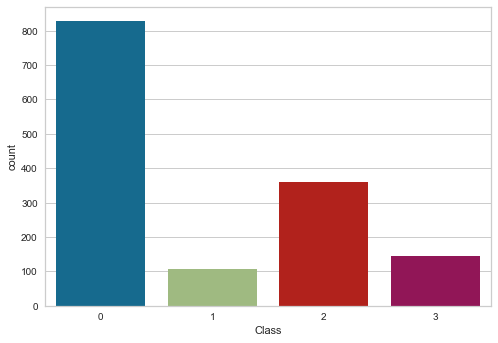

In [34]:
sns.countplot(x='Class', data=final_df)

Visualize the best number of clusters for Kmean model on egy_df

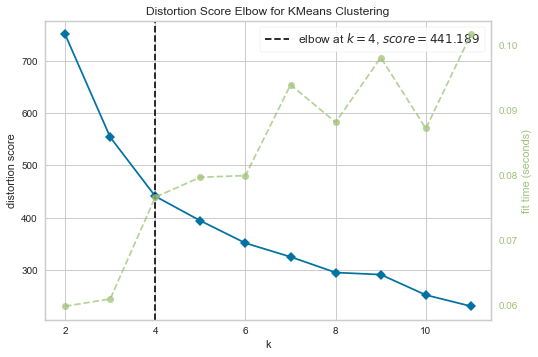

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
kmean_model = KMeans()
visualizer = KElbowVisualizer(kmean_model, k=(2,12)).fit(scaler_egy_df)
visualizer.show()

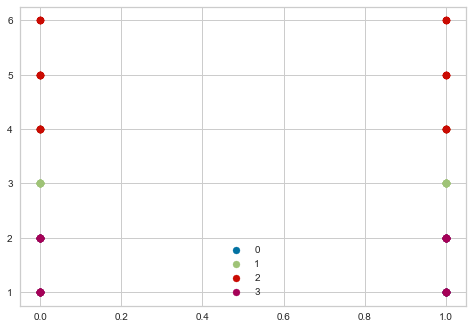

In [36]:
k_mean = KMeans(n_clusters=4).fit(scaler_egy_df)
k_labels = k_mean.labels_
k_predict = k_mean.fit_predict(scaler_egy_df)
unique_labels = np.unique(k_predict)
for i in unique_labels:
    plt.scatter(scaler_egy_df.iloc[k_predict == i , 0] , scaler_egy_df.iloc[k_predict == i , 1] , label = i)
plt.legend()
plt.show()

Silhouette Coefficient for Kmean model  on egy_df data

In [37]:
print("Silhouette Coefficient For Kmeans : %0.3f" % silhouette_score(scaler_egy_df,k_labels))

Silhouette Coefficient For Kmeans : 0.312


### Enhancing Kmean model by applying PCA

In [38]:
pca = PCA()
df_pca =pca.fit(scaler_egy_df) 
pca.explained_variance_ratio_

array([5.99659495e-01, 1.80991208e-01, 5.31494782e-02, 3.59202105e-02,
       3.59202105e-02, 3.59202105e-02, 3.05161253e-02, 2.79230622e-02,
       2.17920395e-33])

Visualize the Best number of components for PCA

Text(0, 0.5, 'cumulative explained variance')

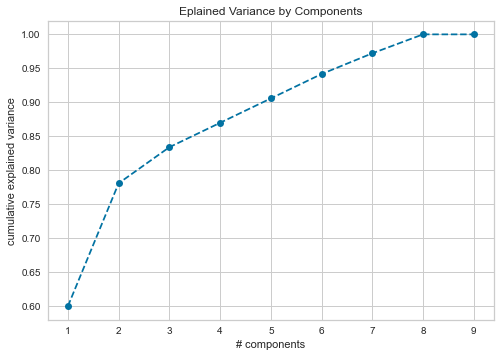

In [39]:
plt.plot(range(1,len(scaler_egy_df.columns)+1),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Eplained Variance by Components')
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [40]:
pca = PCA(2)
df_pc = pca.fit(scaler_egy_df)
_trans = pca.transform(scaler_egy_df)

df_trans = pd.DataFrame(data= _trans)
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       276 non-null    float64
 1   1       276 non-null    float64
dtypes: float64(2)
memory usage: 4.4 KB


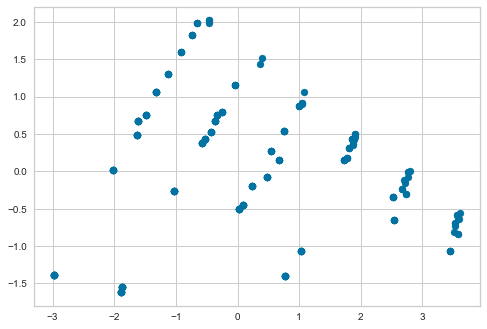

In [41]:
plt.scatter(df_trans[0],df_trans[1])

Appling Kmean Clustering on the Transformed egy_df data

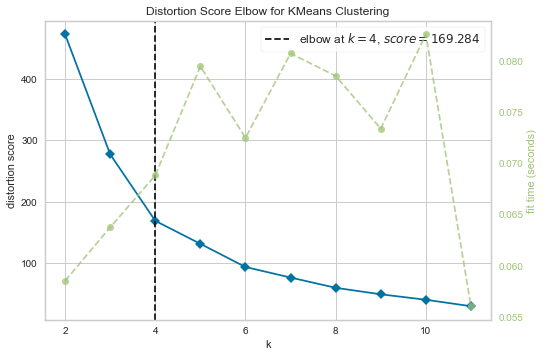

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
kmean_model = KMeans()
visualizer = KElbowVisualizer(kmean_model, k=(2,12)).fit(df_trans)
visualizer.show()

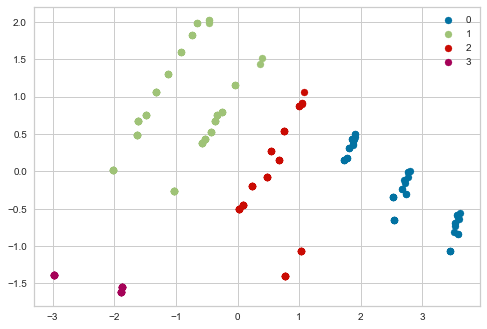

In [43]:
k_mean = KMeans(n_clusters=4).fit(df_trans)
k_labels = k_mean.labels_
k_predict = k_mean.fit_predict(df_trans)
unique_labels = np.unique(k_labels)
for i in unique_labels:
    plt.scatter(df_trans.iloc[k_predict == i , 0] , df_trans.iloc[k_predict == i , 1] , label = i)
plt.legend()
plt.show()

Silhouette Coefficient for Kmean model with PCA on Transformed egy_df data 

In [44]:
print("Silhouette Coefficient For Kmeans with PCA : %0.3f" % silhouette_score(df_trans,k_predict))

Silhouette Coefficient For Kmeans with PCA : 0.517


### Concatenate egy_df with class column which contain label of each cluster

In [45]:
final_egy_df = pd.concat([egy_df.reset_index(drop = True)],axis = 1)

final_egy_df['Class'] = k_labels

final_egy_df.head()

,Gender,Rank (text),Percentage,Q_They are good looking,Q_They are intelligent,Q_They have a personality I like,Q_They have a sense of humour I like,Q_They have similar interests to me,Q_They have/make a decent amount of money,Class
0,1,4,0.441084,1,0,0,0,0,0,1
1,1,3,1.890359,1,0,0,0,0,0,3
2,1,4,0.441084,1,0,0,0,0,0,1
3,1,5,0.031506,1,0,0,0,0,0,1
4,1,3,1.890359,1,0,0,0,0,0,3


In [46]:
final_egy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     276 non-null    int32  
 1   Rank (text)                                276 non-null    int64  
 2   Percentage                                 276 non-null    float64
 3   Q_They are good looking                    276 non-null    uint8  
 4   Q_They are intelligent                     276 non-null    uint8  
 5   Q_They have a personality I like           276 non-null    uint8  
 6   Q_They have a sense of humour I like       276 non-null    uint8  
 7   Q_They have similar interests to me        276 non-null    uint8  
 8   Q_They have/make a decent amount of money  276 non-null    uint8  
 9   Class                                      276 non-null    int32  
dtypes: float64(1), int32(2), i

Visualize Class of the final_df

<AxesSubplot:xlabel='Class', ylabel='count'>

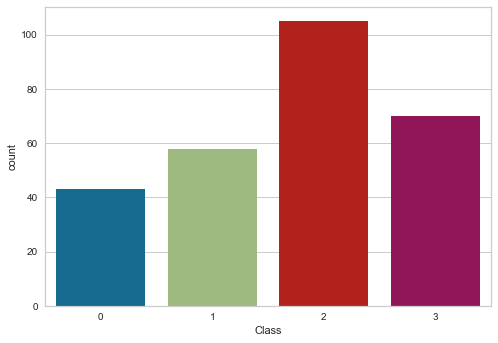

In [47]:
sns.countplot(x='Class', data=final_egy_df)

## Using Final Dataset Which Know is Labeled to classification models

### Split Dataset into Labels an Features and traning and test data 

In [48]:
X = final_egy_df.drop(['Class'],axis=1)
y= final_egy_df[['Class']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=3)

### classification_report of Decision Tree Classifier Model

In [49]:
DTree_model= DecisionTreeClassifier(criterion="entropy")
DTree_model.fit(X_train, y_train)
y_pred = DTree_model.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0  0  0]
 [ 0 16  0  0]
 [ 0  0 25  0]
 [ 0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        24

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [51]:
test = [[0,4,0.2,1,0,0,0,0,0]]
DTree_model.predict(test)

array([1])

### classification_report of Naive Bayes Model 

In [52]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_pred = naive_model.predict(X_test)

In [53]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0  0  0]
 [ 1 15  0  0]
 [ 6  0 19  0]
 [ 2  0  0 22]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        18
           1       1.00      0.94      0.97        16
           2       1.00      0.76      0.86        25
           3       1.00      0.92      0.96        24

    accuracy                           0.89        83
   macro avg       0.92      0.90      0.90        83
weighted avg       0.93      0.89      0.90        83



In [54]:
test = [[1,3,0,1,0,0,0,0,0]]
DTree_model.predict(test)

array([3])

In [55]:
# Gender / Rank / Percentage / Q
test = [[1,6,1.12,1,0,0,0,0,0]]
naive_model.predict(test)

array([1])

In [56]:
# 1 => class_0
# 2 => class_0
# 3 => class_3 or class_2
# 4 => class_1
# 5 => class_1
# 6 => class_1


In [57]:
final_egy_df.columns.values[-4:] = ['High_Rank(1,2)','Low_Rank(4,5,6)','????','Medium_Rank(3)']

final_egy_df['Class'] = final_egy_df['Class'].map({
    0:'High_Rank(1,2)',
    1:'Low_Rank(4,5,6)',
    3:'????',
    2:'Medium_Rank(3)'
    
})

<AxesSubplot:xlabel='Q_They are good looking', ylabel='Rank (text)'>

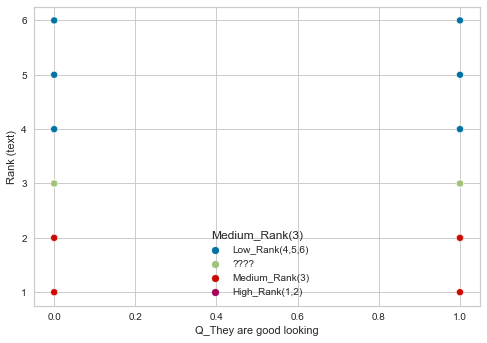

In [58]:
x_axis = final_egy_df['Q_They are good looking']
y_axis = final_egy_df['Rank (text)']
sns.scatterplot(x_axis,y_axis,hue = final_egy_df['Class'])

<AxesSubplot:xlabel='Q_They have a personality I like', ylabel='Percentage'>

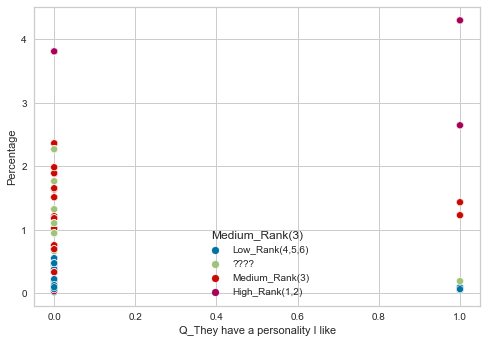

In [59]:
x_axis = final_egy_df['Q_They have a personality I like']
y_axis = final_egy_df['Percentage']
sns.scatterplot(x_axis,y_axis,hue = final_egy_df['Class'])

In [60]:

q_list = [[[0,4,0.2,1,0,0,0,0,0]],[[0,3,0.2,1,0,0,0,0,0]],[[0,5,0.2,1,0,0,0,0,0]],[[0,5,0.2,1,0,0,0,0,0]],[[0,6,0.2,1,0,0,0,0,0]]]


def Add_2_Class(q_list):
    y_pred_list = []
    classes = np.zeros((4,1))
    for i in q_list:
        y_pred_list.append(naive_model.predict(i))

    for i in range(4):
        classes[i] = y_pred_list.count(i)
    return np.argmax(classes)

    

In [61]:
def Class_0():
    print("You are too Optimistic with very High expectation about your partner, I hope that you find all these qualities")
def Class_1():
    print("Be more deterministic, define your priorities and Don't underestimate yourself you deserve better than this ")
def Class_2():
    print("You are Lord of Moderation, very realistic , you know that no one is perfect")

In [62]:
c = Add_2_Class(q_list)
print(c)
if int(c) == 0:
    Class_0()
if int(c) == 1:
    Class_1()
if int(c) == 2:
    Class_2()

1
Be more deterministic, define your priorities and Don't underestimate yourself you deserve better than this 
